# HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\theab\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration

In [24]:
data = pd.read_csv('C:\\Users\\theab\\OneDrive\\Desktop\\HousingPrices-Amsterdam-August-2021.csv')


In [25]:
data

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [31]:
data= data.drop("Unnamed: 0",axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [33]:
data.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


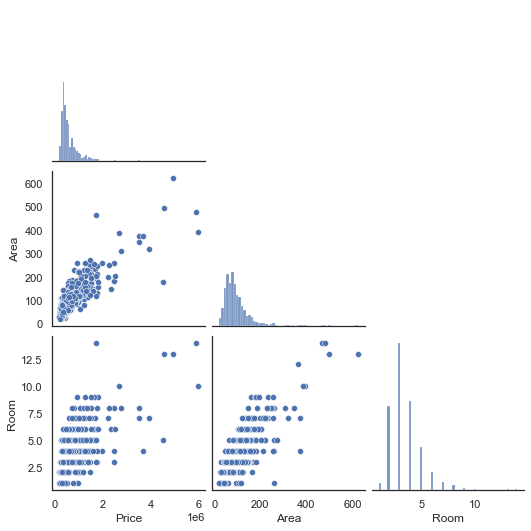

In [34]:
import seaborn as sns
sns.pairplot(data[['Price', 'Area', 'Room']], diag_kind='auto',corner=True)
sns.set_theme(style="white")

# Data Preprocessing

In [35]:
area  = data["Area"].quantile(0.8)
price  = data["Price"].quantile(0.8)
room  = data["Room"].quantile(0.8)

data_class = data[(data["Area"]<=area)&(data["Price"]<=price)&(data["Room"]<=room)]

In [36]:
data_class.describe()

,Price,Area,Room,Lon,Lat
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,422350.192604,70.761171,2.912173,4.889147,52.363673
std,134097.794553,21.477593,0.781730,0.051890,0.024015
min,175000.000000,21.000000,1.000000,4.783188,52.291672
25%,325000.000000,54.000000,2.000000,4.852550,52.352717
50%,395000.000000,71.000000,3.000000,4.884769,52.365273
75%,500000.000000,87.000000,3.000000,4.926678,52.378753
max,785000.000000,120.000000,4.000000,5.016555,52.423805


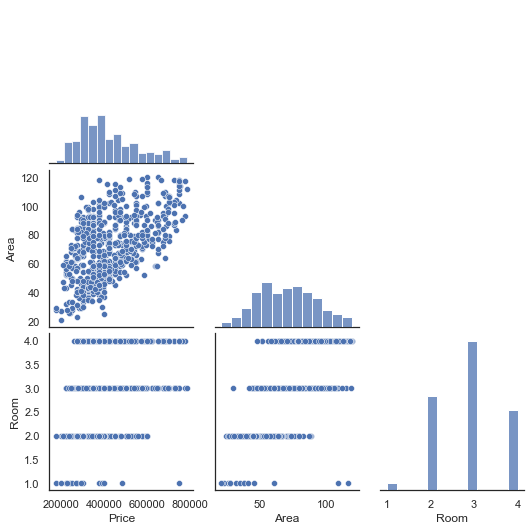

In [37]:
import seaborn as sns
sns.pairplot(data_class[['Price', 'Area', 'Room']], diag_kind='auto',corner=True)
sns.set_theme(style="white")

In [54]:
data_class.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [38]:
numeric_data = data_class.select_dtypes(include=['number'])
numeric_data = numeric_data.dropna()

X = numeric_data[['Area', 'Room', 'Lon', 'Lat']]
y = numeric_data['Price']

# Split the data into training and testing sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Modeling

In [40]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("Ridge Regression", Ridge(alpha=0.1)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=2)),
]

In [41]:
# Initialize lists to store model performance scores
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

In [42]:
# Perform cross-validation for each model
for name, model in models:
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    mae = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2').mean()
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

In [43]:
# Create a DataFrame to compare model performance
results_df = pd.DataFrame({
    "Model": [name for name, _ in models],
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R2": r2_scores
})

In [44]:
max = 0
for i in range(len(results_df['R2'])):
    if i==(len(results_df['R2']))-1:
        if results_df['R2'][i]>results_df['R2'][max]:
            max = i
    else:
        if results_df['R2'][i]>results_df['R2'][i+1]:
               max= i
print(f"Best Model : {results_df['Model'][max]} with accuracy : {results_df['R2'][max]}")

Best Model : Gradient Boosting with accuracy : 0.7889403346491995


In [45]:
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,90585.252797,1.248769e+10,111748.324598,0.266252
1,Lasso Regression,90585.212418,1.248764e+10,111748.107979,0.266255
2,Ridge Regression,90756.173868,1.249396e+10,111776.367388,0.265606
3,Decision Tree,60894.671009,7.702230e+09,87762.351966,0.525772
4,Random Forest,45379.995519,3.680238e+09,60664.961966,0.786848
5,Gradient Boosting,43960.489550,3.537564e+09,59477.426332,0.788940
6,K-Nearest Neighbors,91994.827147,1.501485e+10,122535.087277,0.116523


# Training and Evaluation Accuracy

In [46]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
#Calculate training accuracy
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

In [48]:
# Testing
predicted_price = model.predict(X_test)

In [49]:
# Calculate testing scores
test_mae = mean_absolute_error(y_test, predicted_price)
test_mse = mean_squared_error(y_test, predicted_price)
test_rmse = mean_squared_error(y_test, predicted_price, squared=False)
test_r2 = r2_score(y_test, predicted_price)

In [50]:
print(f' \t SUMMARY \n Training accuracy : {train_r2} \n Testing accuracy : {test_r2}')

 	 SUMMARY 
 Training accuracy : 0.9153170125009005 
 Testing accuracy : 0.7534272871882939
